# Stat1: making probability statements

## Learning objectives
* Statistical testing - what is it good for?
* What is a "statistics"?  
* The two types of confident statements - p-values and confident intervals
* The three approaches used to calculate these values  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

np.random.seed(0)

The scientific question : does wearing orange t-shirts increase happiness. 

Experimental design : randomly splits group if 50 healthy volunteers into two equal groups, let them wear orange t-shirts for a day and quantify their happiness using the happy-meter device

In [2]:
# collect (create?) the data
beige_mean = 10
orange_mean = 12.5
sig = 3
sample_size = 50
beige = np.random.normal(beige_mean, sig, sample_size)
orange = np.random.normal(orange_mean, sig, sample_size)


## The first thing you do with data is PLOT IT! 

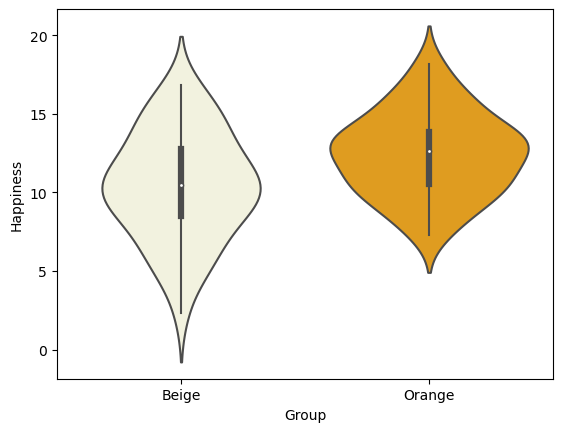

In [3]:
# plot
sns.violinplot(data=[beige, orange], palette=['beige', 'orange'])

plt.xlabel('Group')
plt.ylabel('Happiness')
plt.xticks([0, 1], ['Beige', 'Orange'])
plt.show()

## Key research question - Is it ture? Does orange bring happiness? How can we tell? 

We approach this through three steps: 

Step #1 : decide on a measure (statistics) - a way to summarize the data into a single value. 

Step #2 : this statitics is random (why?) - estimate probablity distribution

Step #3 : Use probability distributions of statistics to make statements 


In [4]:
def diff_of_means(group1,group2):
    """
    This function calculates the difference of means between two groups.

    Parameters:
    group1 (numpy array): The first group of data
    group2 (numpy array): The second group of data

    Returns:
    float: The difference of means between group1 and group2
    """
    
    # Good practice - validate the inputs
    assert isinstance(group1, np.ndarray), "group1 is not a numpy array"
    assert isinstance(group2, np.ndarray), "group2 is not a numpy array"

    # Main code
    diff = group1.mean()-group2.mean()

    # return the value
    return diff

In [5]:
orange_diff = diff_of_means(orange, beige)
print(f"The difference in happiness of the sample means between orange and beige is {orange_diff:.2f}")


The difference in happiness of the sample means between orange and beige is 2.02


Is this value "real"? Does orange bring happiness? 

Use a control! collect happiness data on another beige wearing group and decide

In [6]:
beige2 = np.random.normal(beige_mean, sig, 25)
beige2_diff = diff_of_means(beige2, beige)
print(f"The difference in happiness of the sample means between two beige groups s {beige2_diff:.2f}")

The difference in happiness of the sample means between two beige groups s 0.80


The control make sense, but is that enough? What happens if we repeat this 1000 times? 

Text(0.5, 1.0, 'Histogram of Controlled Experiments')

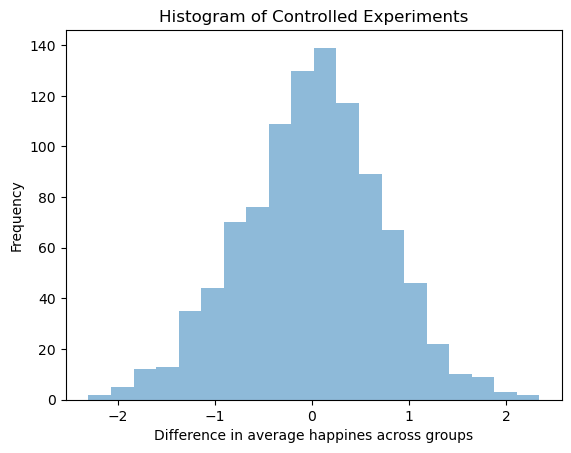

In [8]:
repeats = 1000
controlled_experiment = np.empty(repeats)
for i in range(len(controlled_experiment)):
    beige1 = np.random.normal(beige_mean, sig, sample_size)
    beige2 = np.random.normal(beige_mean, sig, 25)
    controlled_experiment[i] = diff_of_means(beige1, beige2)

# Plotting the histogram
plt.hist(controlled_experiment, bins=20, alpha=0.5)
plt.xlabel('Difference in average happines across groups')
plt.ylabel('Frequency')
plt.title('Histogram of Controlled Experiments')



Compare that to the orange case

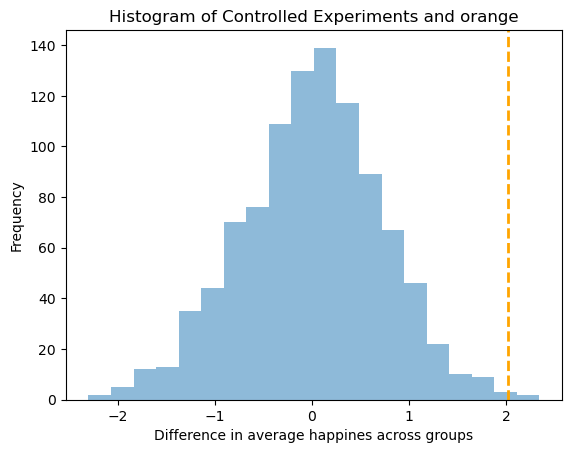

In [9]:
# Plotting the histogram
plt.hist(controlled_experiment, bins=20, alpha=0.5)
plt.xlabel('Difference in average happines across groups')
plt.ylabel('Frequency')
plt.title('Histogram of Controlled Experiments and orange')
plt.axvline(x=orange_diff, color='orange', linestyle='dashed', linewidth=2)


Ok, so this is a bit better, we are not comparing experiment to a single control, we are comparing it to 1000 controls and we can see that while there is a change that our value is random, it's a small change. We can acutually quantify this easity

In [10]:
(orange_diff<=controlled_experiment).sum()

2

so only very few of the controlled experiment showed change in happiness  value. 

Why very few matters? Because low probability are powerful. 

We are ok not beliving in things that are very unlikely.  


**P-value** is a statistical measure that helps scientists determine whether their hypotheses are correct. 
It is a number between 0 and 1 and interpreted in the following way: 
- A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
- A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

### P-values are essentially a test of getting the observed data (or data more extreme) given that the null hypothesis is true. In this context, the null hypothesis typically refers to the controls or baseline group in an experiment.





# The problem

In the experiment above, we did the BEST thing ever, we repeated the experiment 1001 times (1000 beige + 1 orange). With cost of $10 per t-shirt (25 used in each experiment) this was one expensive experiment (not talking about the logistics of getting 1001 students to wear t-shirts and report happiness) 

What alternatives can we use? 

# The solutions: 
## Three different approaches to infer p-values without repeating experiments 1000s of times

## Approach #1 - make some resonable assumptions

In our experiments we collected 25000 happiness scores over beige values. Let's look at them again

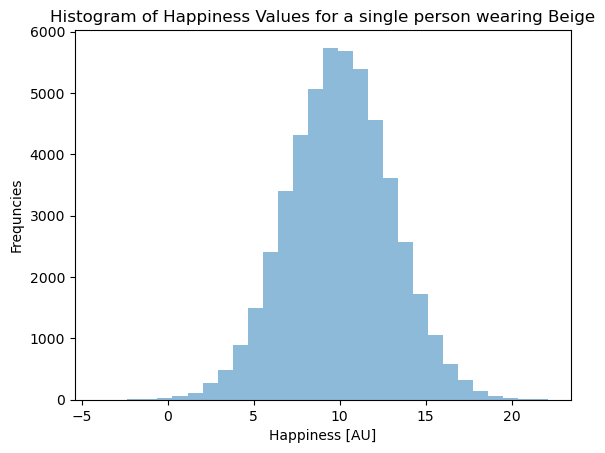

In [11]:
beige_happiness = np.random.normal(loc=beige_mean, scale=sig, size=(repeats, sample_size))

plt.hist(beige_happiness.flatten(), bins=30, alpha=0.5)
plt.xlabel('Happiness [AU]')
plt.ylabel('Frequncies')
plt.title('Histogram of Happiness Values for a single person wearing Beige')
plt.show()



Interestingly, it seems that happiness values have follow a Normal distribution (surprise suprise...). 

The parametric approach allows you to make assumptions of how the values in the population are distributed and use that to your advantage

Before we move on, let's make sure we all get the difference between individual and mean happiness

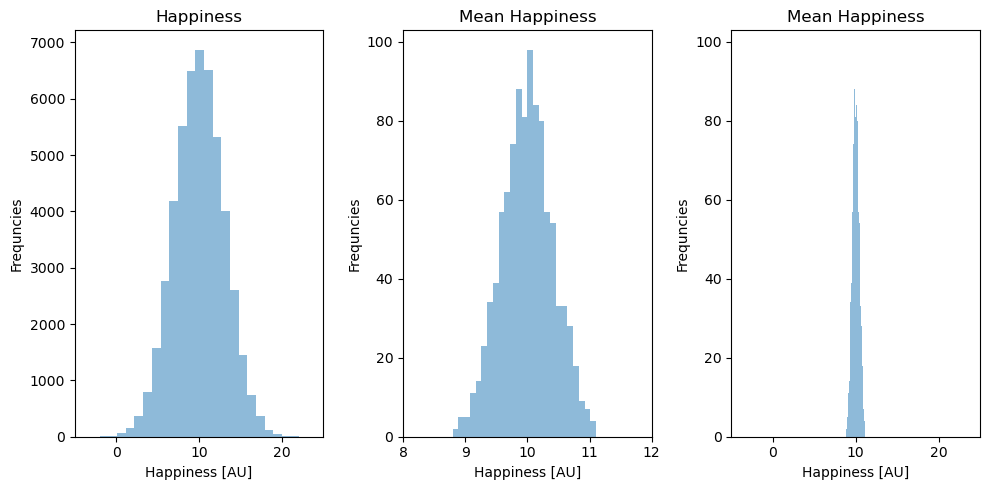

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].hist(beige_happiness.flatten(), bins=25, alpha=0.5)
axs[0].set_xlabel('Happiness [AU]')
axs[0].set_ylabel('Frequncies')
axs[0].set_xlim((-5,25))
axs[0].set_title('Happiness')

axs[1].hist(beige_happiness.mean(axis=1), bins=25, alpha=0.5)
axs[1].set_xlabel('Happiness [AU]')
axs[1].set_ylabel('Frequncies')
axs[1].set_title('Mean Happiness')
axs[1].set_xlim((8,12))

axs[2].hist(beige_happiness.mean(axis=1), bins=25, alpha=0.5)
axs[2].set_xlabel('Happiness [AU]')
axs[2].set_ylabel('Frequncies')
axs[2].set_title('Mean Happiness')
axs[2].set_xlim((-5,25))

plt.tight_layout()
plt.show()


In [15]:
print("Standard Deviation of Flatten: ", beige_happiness.flatten().std())
print("SEM (Standard Deviation of Mean by Row): ", beige_happiness.mean(axis=1).std())


Standard Deviation of Flatten:  3.000923191889489
SEM (Standard Deviation of Mean by Row):  0.411935979170226


Note the difference between these two. 

### Student t-test a poster child for parametric testing

The t-test is a statistical test that is used to determine if there is a significant difference between the means of two groups. It is based on the Student's t-distribution, which is a type of probability distribution that is symmetric and bell-shaped, like the normal distribution, but has heavier tails, which means it is more prone to producing values that fall far from its mean.

The t-distribution arises when estimating the mean of a normally distributed population in situations where the sample size is small and population standard deviation is unknown. It is defined as:

$$ t = \frac{\bar{X} - \mu}{s/\sqrt{n}} $$

where:
 - $\bar{X}$ is the sample mean,
 - $\mu$ is the population mean,
 - $s$ is the sample standard deviation, and
 - $n$ is the sample size.


IF (a big one) X follows normal distribution than this summary t follows another known distribution (student t) that is very similar to Normal. It's not exactly Normal due to the uncertianty in estimation of the s. As sample size increases (>30 or so) student t is the same as Normal. 


In [16]:
# Perform t-test
t_stat, p_val = stats.ttest_ind(orange,beige)

# Print the results
print(f'The t-statistic is {t_stat:.3f} and the p-value is {p_val:.3f}')


The t-statistic is 3.310 and the p-value is 0.001


Parametric approaches are awesome, if the assumptions are true. 
Check them! 

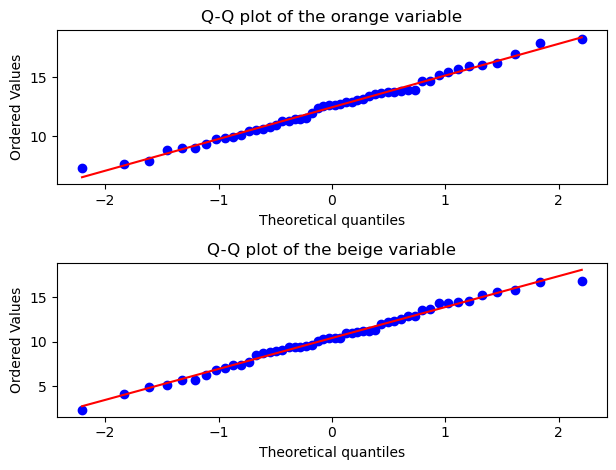

In [17]:
# Create a figure with two subplots
fig, axs = plt.subplots(2)

# Create a Q-Q plot for the orange variable
stats.probplot(orange, dist="norm", plot=axs[0])
axs[0].set_title('Q-Q plot of the orange variable')

# Create a Q-Q plot for the beige variable
stats.probplot(beige, dist="norm", plot=axs[1])
axs[1].set_title('Q-Q plot of the beige variable')

# Display the figure
plt.tight_layout()
plt.show()



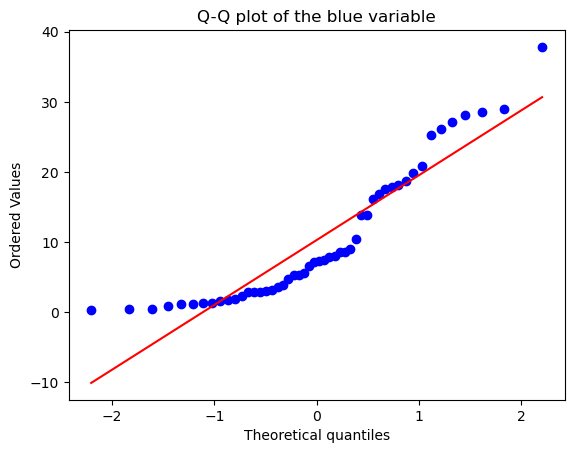

In [18]:
# Create a variable blue that is sampled from exponential distribution
blue = np.random.exponential(np.mean(beige), size=len(beige))

# Create a Q-Q plot for the blue variable
stats.probplot(blue, dist="norm", plot=plt.figure().add_subplot(111))
plt.title('Q-Q plot of the blue variable')
plt.show()


It's important to note that the p-value we obtain from a statistical test is dependent on several factors:

1. Effect size: This is the difference between the means of the two groups. Larger differences tend to result in smaller p-values.

2. Variability in the population: More variability can lead to larger p-values as it increases the chance of observing extreme values by chance.

3. Sample size: Larger sample sizes tend to provide more accurate estimates, and thus smaller p-values.


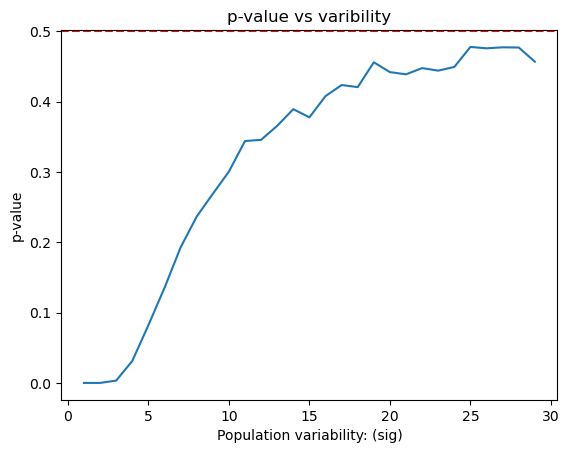

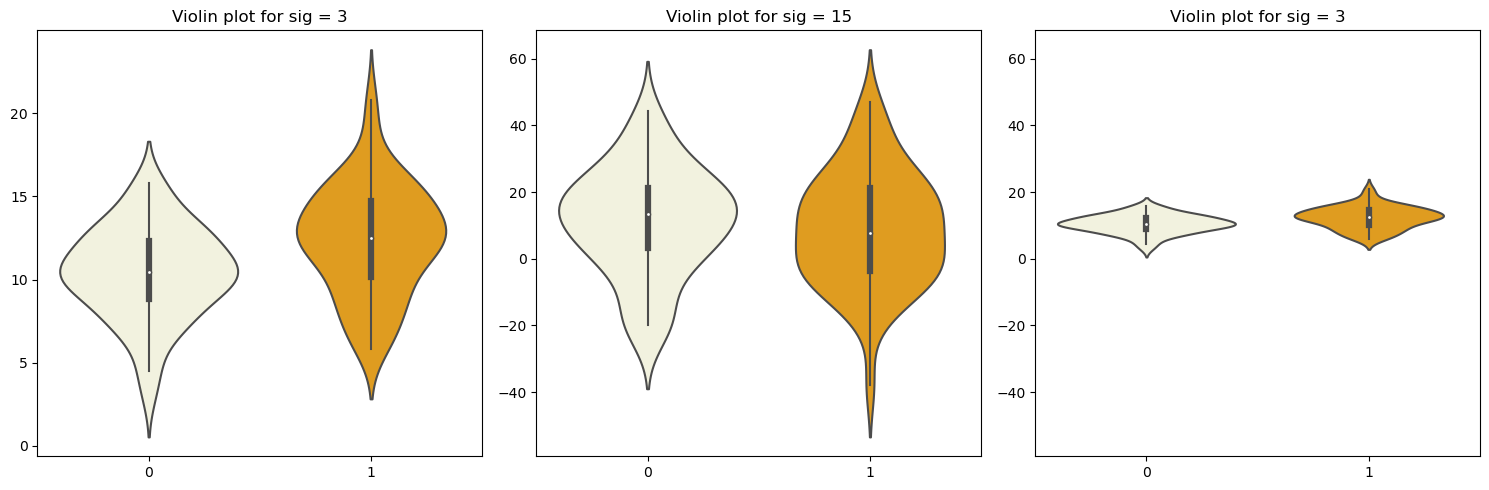

In [30]:
sig_values = np.arange(1, 30)
iter = 1000
p_values = np.zeros((len(sig_values),iter))

for i, s in enumerate(sig_values):
    for j in range(iter):
        beige_sigtest = np.random.normal(beige_mean, s, sample_size)
        orange_sigtest = np.random.normal(orange_mean, s, sample_size)
        t_stat, p_values[i,j] = stats.ttest_ind(beige_sigtest, orange_sigtest)

p_values = p_values.mean(axis=1)

plt.plot(sig_values, p_values)
plt.xlabel('Population variability: (sig)')
plt.ylabel('p-value')
plt.title('p-value vs varibility')
plt.axhline(y=0.5, color='r', linestyle='--')

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Violin plot for sig = 3
beige_sig3 = np.random.normal(beige_mean, 3, sample_size)
orange_sig3 = np.random.normal(orange_mean, 3, sample_size)
sns.violinplot(data=[beige_sig3, orange_sig3], ax=axs[0],palette=['beige', 'orange'])
axs[0].set_title('Violin plot for sig = 3')

# Violin plot for sig = 15
beige_sig15 = np.random.normal(beige_mean, 15, sample_size)
orange_sig15 = np.random.normal(orange_mean, 15, sample_size)
sns.violinplot(data=[beige_sig15, orange_sig15], ax=axs[1],palette=['beige', 'orange'])
axs[1].set_title('Violin plot for sig = 15')

sns.violinplot(data=[beige_sig3, orange_sig3], ax=axs[2],palette=['beige', 'orange'])
axs[2].set_title('Violin plot for sig = 3')
axs[2].set_ylim(axs[1].get_ylim())

plt.tight_layout()
plt.show()




In [25]:
sig

3

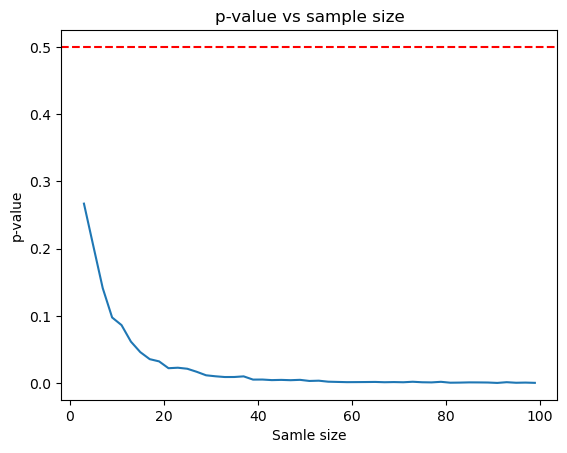

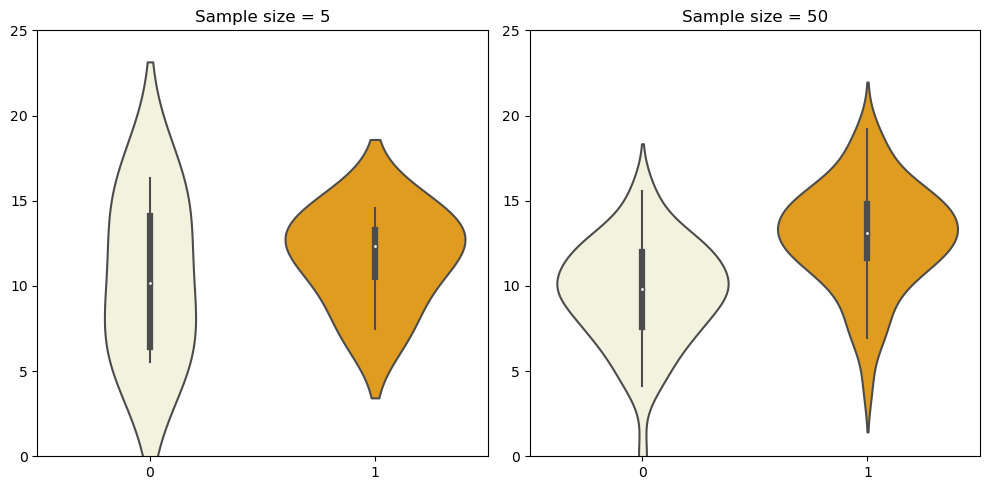

In [31]:
sample_size_vec = np.arange(3, 100,2)
iter = 1000
p_values = np.zeros((len(sample_size_vec),iter))

for i, s in enumerate(sample_size_vec):
    for j in range(iter):
        beige_sample_size_test = np.random.normal(beige_mean, sig, s)
        orange_sample_size_test = np.random.normal(orange_mean, sig, sample_size)
        t_stat, p_values[i,j] = stats.ttest_ind(beige_sample_size_test, orange_sample_size_test)

p_values = p_values.mean(axis=1)

plt.plot(sample_size_vec, p_values)
plt.xlabel('Samle size')
plt.ylabel('p-value')
plt.title('p-value vs sample size')
plt.axhline(y=0.5, color='r', linestyle='--')

plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Violin plot for sig = 3
beige_sz5 = np.random.normal(beige_mean, sig, 5)
orange_sz5 = np.random.normal(orange_mean, sig, 5)
sns.violinplot(data=[beige_sz5, orange_sz5], ax=axs[0],palette=['beige', 'orange'])
axs[0].set_title('Sample size = 5')
axs[0].set_ylim([0,25])

# Violin plot for sig = 15
beige_sz50 = np.random.normal(beige_mean, sig, 50)
orange_sz50 = np.random.normal(orange_mean, sig, 50)
sns.violinplot(data=[beige_sz50, orange_sz50], ax=axs[1],palette=['beige', 'orange'])
axs[1].set_title('Sample size = 50')
axs[1].set_ylim([0,25])

plt.tight_layout()
plt.show()


### One way to account for variability - paired testing
The key idea is that you accounting for variability you can't control
In this case, it's simple, you just measure delta-happiness, so even if the population is variable in it's happiness you can see it


Paired t-test p-value: 1.679442603018347e-07
Unpaired t-test p-value: 0.5909947838357767


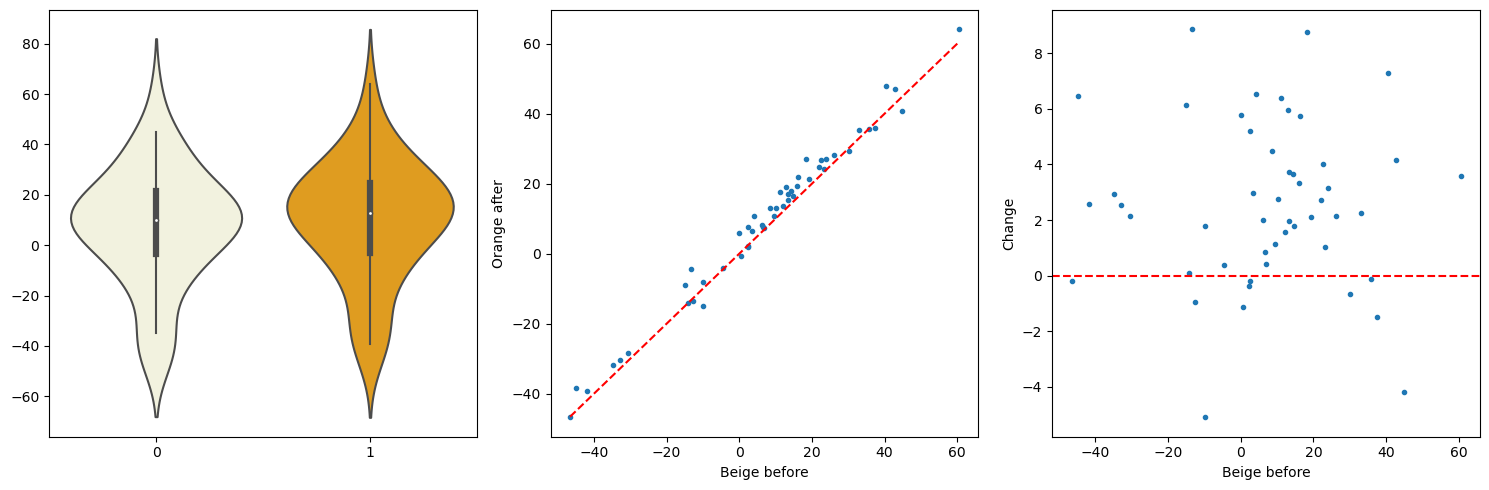

In [34]:
beige_before = np.random.normal(beige_mean, sig_values[-1], sample_size)
orange_after = beige_before + np.random.normal(orange_mean - beige_mean, sig, sample_size)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(data=[beige_before, orange_after], ax=axs[0],palette=['beige', 'orange'])

axs[1].plot(beige_before,orange_after,'.')
axs[1].set_xlabel('Beige before')
axs[1].set_ylabel('Orange after')
axs[1].plot([min(beige_before), max(beige_before)], [min(beige_before), max(beige_before)], '--',color='red')

change = orange_after - beige_before
axs[2].plot(beige_before, change, '.')
axs[2].set_xlabel('Beige before')
axs[2].set_ylabel('Change')
axs[2].axhline(0, color='red', linestyle='--')

plt.tight_layout()

paired_t_stat, paired_p_value = stats.ttest_rel(beige_before, orange_after)
unpaired_t_stat, unpaired_p_value = stats.ttest_ind(beige_before, orange_after)

print(f"Paired t-test p-value: {paired_p_value}")
print(f"Unpaired t-test p-value: {unpaired_p_value}")


The idea that we can "account" for factors in the data that can "mask" the effect we want is what a lot of more advanced statistics (multivariable regression, etc) is about

There is a lot more to say about parametric statistical testing... but in the spirit of empowerment and self-learning ask your robot 

Type this in the robot-chat: 

<span style='color:orange'>what parametric statistical testing should I use to compare two categrotical variables frequencies</span>

### Approach #2: Non-parametric tests

What if your assumptions are wrong? 

Over the years statisiticians develops "work arounds" . 

More comperhensive list of "workarounds" is on wikipedia: https://en.wikipedia.org/wiki/Nonparametric_statistics Ask your robot for details on anything you need. 


One illustrative example of non-parametric test - sign test


In [35]:
data = {'Beige': beige_before, 'Orange': orange_after}
df = pd.DataFrame(data)
df.head(10)


,Beige,Orange
0,30.120309,29.467211
1,15.952825,19.266732
2,18.314545,27.080524
3,-12.620600,-13.583408
4,0.599271,-0.528038
5,12.070020,13.647153
6,37.492124,36.016087
7,14.305939,17.942275
8,3.462687,6.445751
9,0.025726,5.816810


We can add another column to ask if orange happiness is bigger than biege

In [36]:
df['Orange_>_Beige'] = (df['Orange'] > df['Beige']).astype(int)
df.head(10)

,Beige,Orange,Orange_>_Beige
0,30.120309,29.467211,0
1,15.952825,19.266732,1
2,18.314545,27.080524,1
3,-12.620600,-13.583408,0
4,0.599271,-0.528038,0
5,12.070020,13.647153,1
6,37.492124,36.016087,0
7,14.305939,17.942275,1
8,3.462687,6.445751,1
9,0.025726,5.816810,1


Under the NULL model (i.e. assuming that there is no difference) you expect to get a 50-50 coin flip, sometimes orange is large and sometimes biege is

In other words, the "trick" is to convert the values into a "coin flip" and test whther it is likely to get that many ones

In [42]:
n = len(df['Orange_>_Beige'])
k = df['Orange_>_Beige'].sum()
p = 0.5

prob = stats.binom.pmf(k, n, p)
print(f"Overall, out of {n} cases, in {k} wearing orange increases happiness")
print(f"Under the null model (p=0.5), the probability of that is: {prob:.3e}")



Overall, out of 50 cases, in 40 wearing orange increases happiness
Under the null model (p=0.5), the probability of that is: 9.124e-06


In [47]:
from scipy.stats import wilcoxon

result = wilcoxon(df['Beige'], df['Orange'])
print(f"Wilcoxin signed rank test p-value: {result[1]:.2e}")


Wilcoxin signed rank test p-value: 1.40e-07


Non-parametric approaches lose some power, i.e. the ability to detect a difference for a given effect size / sample size / variability compared to parametric approchees. But they make less assumptions, everything has a price... 

### Approach #3: Computational statitics - permutations / bootstrap / etc. 

In this approach we are back to the basics, we want to repeat experiments lots of times and use the results of these experiemnts to make probabilistic statements. The "trick" is that rather do these experiment on the bench (or buying 25000 t-shrits) you do then on the comptuer by smartly rearranging the data in random ways. 

Let's go back to the non-paired orange and biege data.  

In [48]:
data = {'Beige': beige, 'Orange': orange}
df = pd.DataFrame(data)
df.head(10)

,Beige,Orange
0,15.292157,9.813600
1,11.200472,13.660707
2,12.936214,10.967585
3,16.722680,8.958103
4,15.602674,12.415453
5,7.068166,13.784996
6,12.850265,12.699552
7,9.545928,13.407416
8,9.690343,10.597034
9,11.231796,11.411777


This format of the data is called "Wide" as columns are used to indicate what the data is. Anther way to organize this data is called "long" where each observation gets it's own row with all the information about it (includeing t-shirt color)

In [50]:
data = {'Beige': beige, 'Orange': orange}
df = pd.DataFrame(data)
df_long = df.melt(var_name='Color', value_name='Value')
df_long


,Color,Value
0,Beige,15.292157
1,Beige,11.200472
2,Beige,12.936214
3,Beige,16.722680
4,Beige,15.602674
...,...,...
95,Orange,14.619720
96,Orange,12.531500
97,Orange,17.857611
98,Orange,12.880736


Now, in the "Null" model, does it matter what the label for a row is? It shouldn't as the Null assumption is that the color doesn't matter

Therefore, rather then go and collect more data, we can take the data we have and randomly rearrange (permute) the color columns

In [51]:
df_perm = df_long.copy()
df_perm['Color'] = np.random.permutation(df_perm['Color'])
df_perm

,Color,Value
0,Orange,15.292157
1,Orange,11.200472
2,Beige,12.936214
3,Orange,16.722680
4,Beige,15.602674
...,...,...
95,Beige,14.619720
96,Beige,12.531500
97,Beige,17.857611
98,Orange,12.880736


In [52]:
def diff_of_means_df(df):
    """
    This function calculates the difference of means between two groups.

    Parameters:
    df (pandas DataFrame): The dataframe with 'Color' and 'Value' columns

    Returns:
    float: The difference of means between group1 and group2
    """

    # Good practive - validate the inputs
    assert isinstance(df, pd.DataFrame), "Input is not a pandas DataFrame"
    assert 'Color' in df.columns, "'Color' column is not in the DataFrame"
    assert 'Value' in df.columns, "'Value' column is not in the DataFrame"

    # Body of the code
    means = df.groupby('Color')['Value'].mean()
    diff = means['Orange'] - means['Beige']

    # return the value
    return diff
   

In [53]:
print(f"diff_of_means_df: {diff_of_means_df(df_long):.4f}, diff_of_means: {diff_of_means(orange,beige):.4f}")


diff_of_means_df: 2.0155, diff_of_means: 2.0155


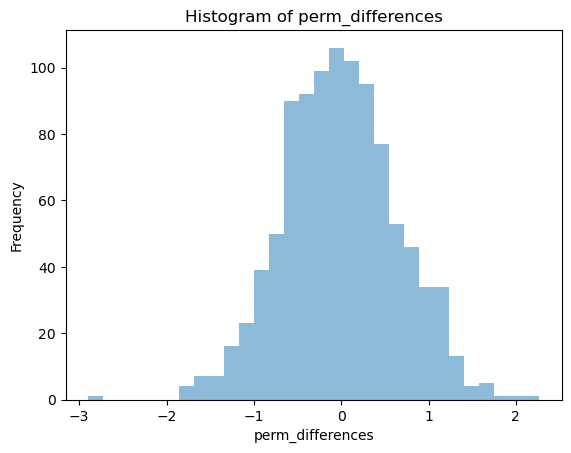

In [54]:
iter = 1000
perm_differences = np.zeros(iter)
for i in range(iter):
    df_perm = df_long.copy()
    df_perm['Color'] = np.random.permutation(df_perm['Color'])
    perm_differences[i] = diff_of_means_df(df_perm)

plt.hist(perm_differences, bins=30, alpha=0.5)
plt.xlabel('perm_differences')
plt.ylabel('Frequency')
plt.title('Histogram of perm_differences')
plt.show()


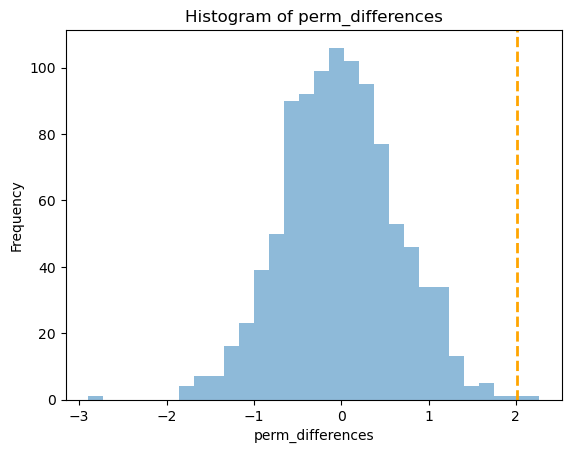

In [55]:
# Plotting the histogram
orange_diff = diff_of_means_df(df_long)
plt.hist(perm_differences, bins=30, alpha=0.5)
plt.xlabel('perm_differences')
plt.ylabel('Frequency')
plt.title('Histogram of perm_differences')
plt.axvline(x=orange_diff, color='orange', linestyle='dashed', linewidth=2)

To show that we accomplished inference similar to the one were we "truely" repeated the experiment

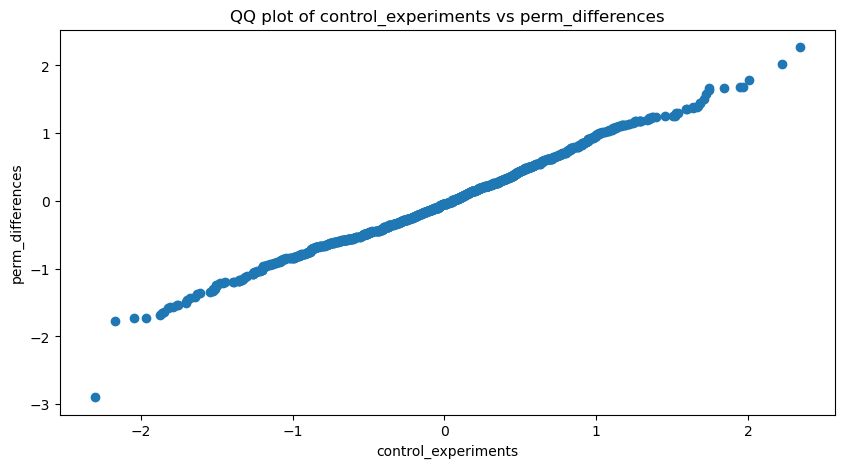

In [56]:
plt.figure(figsize=(10, 5))
plt.scatter(np.sort(controlled_experiment), np.sort(perm_differences))
plt.xlabel('control_experiments')
plt.ylabel('perm_differences')
plt.title('QQ plot of control_experiments vs perm_differences')
plt.show()



How will you do this for the paired data? What would you permute? 


In [57]:
def diff_of_perm_paired_df_wide(df_wide):
    arr = df_wide.values
    permuted_arr = np.array([np.random.permutation(row) for row in arr])
    diff = np.diff(permuted_arr)
    mean_diff = diff.mean()
    return mean_diff



In [59]:
df_paired = pd.DataFrame({'Beige': beige_before, 'Orange': orange_after})
print(f"diff of paired data is {diff_of_perm_paired_df_wide(df_paired):3f}")

diff of paired data is -0.142076


Not repeat this lots of times


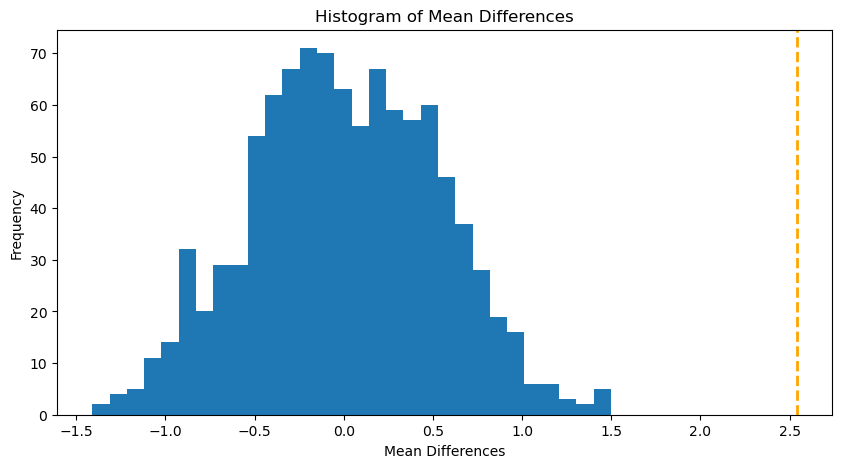

In [60]:
iter = 1000
mean_diffs_perm_paired = np.zeros(iter)
for i in range(iter):
    mean_diffs_perm_paired[i] = diff_of_perm_paired_df_wide(df_paired)


plt.figure(figsize=(10, 5))
plt.hist(mean_diffs_perm_paired, bins=30)
plt.xlabel('Mean Differences')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Differences')
mean_diff = np.mean(orange_after - beige_before)
plt.axvline(mean_diff, color='orange', linestyle='dashed', linewidth=2)

plt.show()


As you can see, permutations are POWERFULL! they are flexible tools to encode specific assumptions into a permutation scheme that allows you to infer the distribution of the "null" state without doing lots of experiments. 

There are lots of way to permute data and in each case you are malking a slightly different assumptions about that the Null is. 

So make sure you THINK CAREFULLY and develop a well reasoned permutation scheme. 

## The other type of probabilistic statement - the confident interval
While p-value is the "workhorse" of probabilistic statements, there is another tool that is very useful. 

Confident interval - a statement about the range of values we belive a specific random variable could have

Let's go back to the case where we "measured" the happiness of 1000 groups of 25 students wearing beige

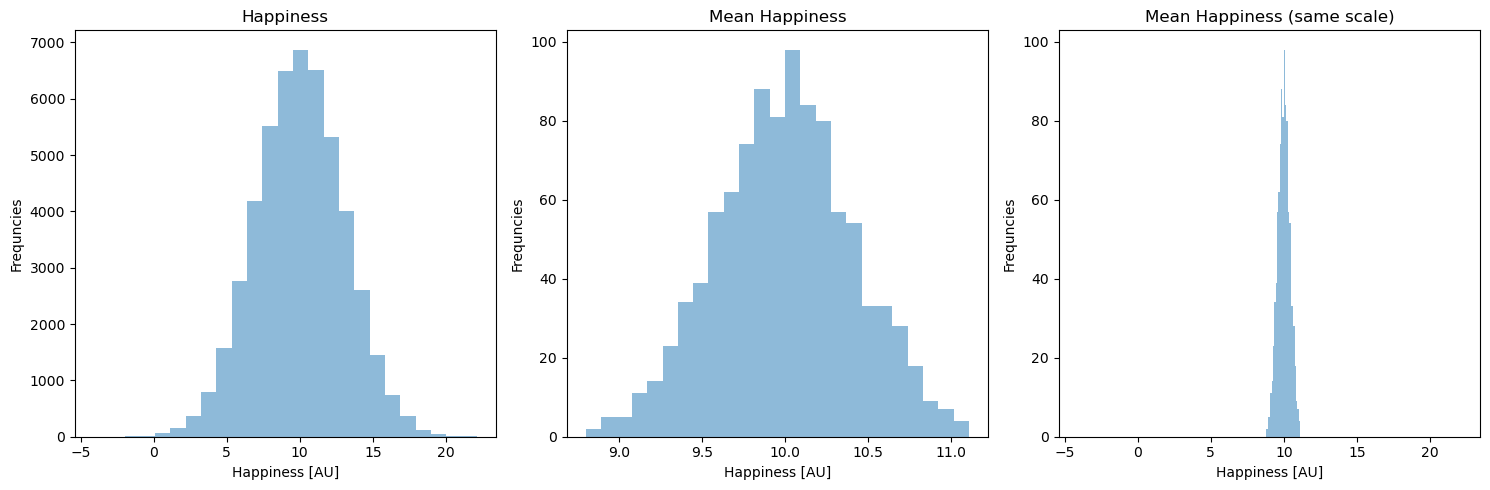

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(beige_happiness.flatten(), bins=25, alpha=0.5)
axs[0].set_xlabel('Happiness [AU]')
axs[0].set_ylabel('Frequncies')
axs[0].set_title('Happiness')

axs[1].hist(beige_happiness.mean(axis=1), bins=25, alpha=0.5)
axs[1].set_xlabel('Happiness [AU]')
axs[1].set_ylabel('Frequncies')
axs[1].set_title('Mean Happiness')

axs[2].hist(beige_happiness.mean(axis=1), bins=25, alpha=0.5)
axs[2].set_xlabel('Happiness [AU]')
axs[2].set_ylabel('Frequncies')
axs[2].set_title('Mean Happiness (same scale)')
axs[2].set_xlim(axs[0].get_xlim())

plt.tight_layout()
plt.show()

In this case, since we have the full data, we can just calcualte the ranges that a given random variable can have. 

Example 1: the random variable is the happiness (or lack thereof) of someone wearing beige

In [63]:
individual_CI = np.percentile(beige_happiness.flatten(),[2.5,97.5])
print(f"The 2.5th percentile of the individual's happiness is {individual_CI[0]:.3f}")
print(f"The 97.5th percentile of the individual's happiness is {individual_CI[1]:.3f}")


The 2.5th percentile of the individual's happiness is 4.143
The 97.5th percentile of the individual's happiness is 15.854


Example 2: the random variable is the mean happiness of a sample of people wearing beige

In [64]:
sample_mean_CI = np.percentile(beige_happiness.mean(axis=1),[2.5,97.5])
print(f"The 2.5th percentile of the sample mean happiness is {sample_mean_CI[0]:.3f}")
print(f"The 97.5th percentile of the sample mean happiness is {sample_mean_CI[1]:.3f}")

The 2.5th percentile of the sample mean happiness is 9.172
The 97.5th percentile of the sample mean happiness is 10.797


Any summary of data you generate, is a "statistical measure" and if it is based on anything random (ie. a sample) you can (and should) estimate the confident intervals for your preduictions, 

Similar to p-values, you can do that using a parametric approach or resampling approach. 

Like p-values, the parametric approach simply makes a bunch of assumptions that allow you to use formulas to calcuate the CI 

For example: 

In [65]:
parametric_sample_mean_CI = stats.t.interval(0.95, len(beige_happiness.mean(axis=1))-1, loc=np.mean(beige_happiness.mean(axis=1)), scale=np.std(beige_happiness.mean(axis=1)))
print(f"The 2.5th percentile of the sample mean happiness is {parametric_sample_mean_CI[0]:.3f}")
print(f"The 97.5th percentile of the sample mean happiness is {parametric_sample_mean_CI[1]:.3f}")


The 2.5th percentile of the sample mean happiness is 9.189
The 97.5th percentile of the sample mean happiness is 10.806


### Approach 2 - resampling - the bootstrap

Let's go back to a simple sample of Orange wearing happiness: 

Text(0, 0.5, 'Frequncy')

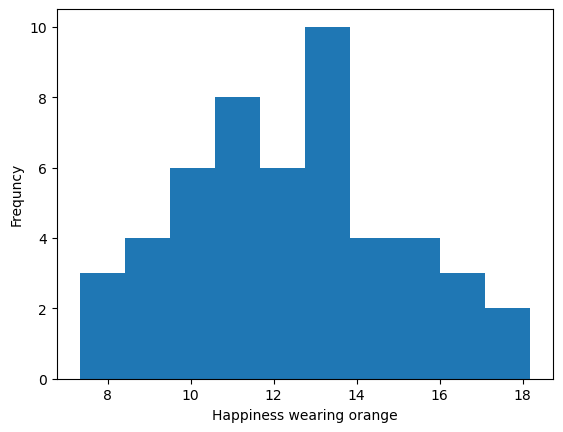

In [67]:
plt.hist(orange)
plt.xlabel('Happiness wearing orange')
plt.ylabel('Frequncy')

We can directly estimate the CI for individual wearing orange 
we have a sample (see histogram) so we really just need to take the 2.5% / 97.5%

In [68]:
individual_orange_CI = np.percentile(orange,[2.5,97.5])
print(f"The 2.5th percentile of the individual's happiness is {individual_orange_CI[0]:.3f}")
print(f"The 97.5th percentile of the individual's happiness is {individual_orange_CI[1]:.3f}")

The 2.5th percentile of the individual's happiness is 7.673
The 97.5th percentile of the individual's happiness is 17.657


But what about the sample mean? How can we calculate the CI of something we only have a single value of? 

Similar to permutation, the key is to create a computational experiment that mimics the real worlds as best as you can

The key question is: what do you have that is a representation of the world (entire population of people wearing orange t-shirts)? 

The answer is: your sample. The sample is the best thing you have as a representation of the world. 

Normal sampling: sampling from the world. 

Replace the world with your sample, and you got bootstrap sample. 

Bootstrap samling: sampling from your sample. 

Since you are really sampling, it has to be done with replacement (the world shouldn't change as you sample from it)

In [69]:
bootstrap_sample = np.random.choice(orange, size=len(orange), replace=True)
bootstrap_sample.mean()


12.445829389392559

Now do that lots of times

In [70]:
iter = 10000
bootstrap_matrix = np.zeros((iter, len(orange)))
for i in range(iter):
    bootstrap_sample = np.random.choice(orange, size=len(orange), replace=True)
    bootstrap_matrix[i,:] = bootstrap_sample


The 2.5th percentile of the sample mean (bootstrap) is 11.721
The 97.5th percentile of the sample mean (bootstrap) is 13.156


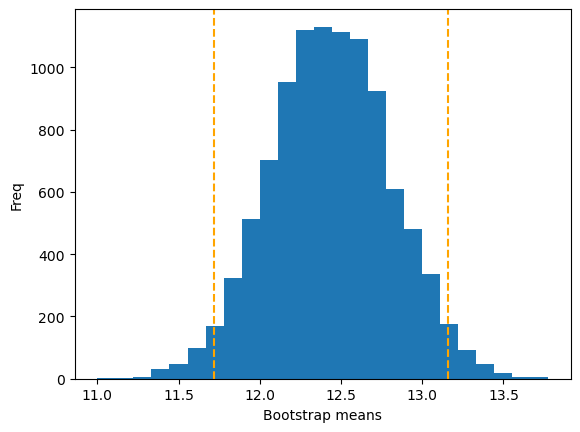

In [71]:
bootstrap_means = bootstrap_matrix.mean(axis=1)
plt.hist(bootstrap_means,bins=25)
plt.xlabel('Bootstrap means')
plt.ylabel('Freq')

bootstrap_mean_CI = np.percentile(bootstrap_means,[2.5,97.5])

plt.axvline(bootstrap_mean_CI[0], color='orange', linestyle='--')
plt.axvline(bootstrap_mean_CI[1], color='orange', linestyle='--')


print(f"The 2.5th percentile of the sample mean (bootstrap) is {bootstrap_mean_CI[0]:.3f}")
print(f"The 97.5th percentile of the sample mean (bootstrap) is {bootstrap_mean_CI[1]:.3f}")


### Multiple hypothesis testing

Suppose we are working on a large dataset of patients, and we are interested in finding out if there are any significant associations between 100 different genes (variables) and a particular disease.

For each gene, we perform a separate hypothesis test. We set our significance level (alpha) at 0.05, meaning we are willing to accept a 5% chance of making a Type I error (false positive) for each test.

Here's the problem: as we increase the number of tests, the probability of observing at least one significant result just by chance (false positive) also increases. This is known as the problem of multiple comparisons or multiple testing.

Let's illustrate this with a simple Python simulation:

In [72]:
# Set the seed for reproducibility
np.random.seed(0)

# Number of tests
num_tests = 100

# Significance level for each test
alpha = 0.05

# Simulate p-values from uniform distribution (null hypothesis is true)
p_values = np.random.uniform(0, 1, num_tests)

# Perform multiple tests
significant_tests = p_values < alpha

print(f"Number of tests that were significant: {significant_tests.sum()}")

Number of tests that were significant: 5


In this simulation, we would expect about 5% of the tests to be significant just by chance, even though the null hypothesis is true for all tests (since we sampled the p-values from a uniform distribution).

To correct for multiple testing, we can use methods like Bonferroni correction, which adjusts the significance level by the number of tests. In this case, we would use an alpha of 0.05/100 = 0.0005 for each test.

In [73]:
# Perform Bonferroni correction
bonferroni_alpha = alpha / num_tests

# Perform multiple tests with Bonferroni correction
significant_tests_bonferroni = p_values < bonferroni_alpha

print(f"Number of tests that were significant with Bonferroni correction: {significant_tests_bonferroni.sum()}")

Number of tests that were significant with Bonferroni correction: 0


But using Bonfferoni is costly, we might miss true significant tests

In [74]:
# Set the seed for reproducibility
np.random.seed(0)

# Number of tests and number of true positives
num_tests = 100
num_true_positives = 10

# Significance level for each test
alpha = 0.05

# Simulate p-values from uniform distribution for true null hypotheses
p_values_null = np.random.uniform(0, 1, num_tests - num_true_positives)

# Simulate p-values from beta distribution for false null hypotheses
p_values_alt = np.random.beta(0.25, 10, num_true_positives)

# Combine all p-values
p_values = np.concatenate([p_values_null, p_values_alt])

# Perform multiple tests without correction
significant_tests = p_values < alpha
print(f"Number of tests that were significant without correction: {significant_tests.sum()}")

# Perform Bonferroni correction
bonferroni_alpha = alpha / num_tests
significant_tests_bonferroni = p_values < bonferroni_alpha
print(f"Number of tests that were significant with Bonferroni correction: {significant_tests_bonferroni.sum()}")

Number of tests that were significant without correction: 12
Number of tests that were significant with Bonferroni correction: 2


In [76]:
def FDR(p_values, alpha=0.05):
    n = len(p_values)
    sorted_indices = np.argsort(p_values)
    sorted_p_values = p_values[sorted_indices]
    sorted_thresholds = [((i+1)/n)*alpha for i in range(n)]
    reject = sorted_p_values <= sorted_thresholds
    return reject, sorted_p_values, sorted_thresholds

reject, sorted_p_values, sorted_thresholds = FDR(p_values, alpha=0.05)

print(f"Number of tests that were significant with FDR correction: {reject.sum()}")

Number of tests that were significant with FDR correction: 4


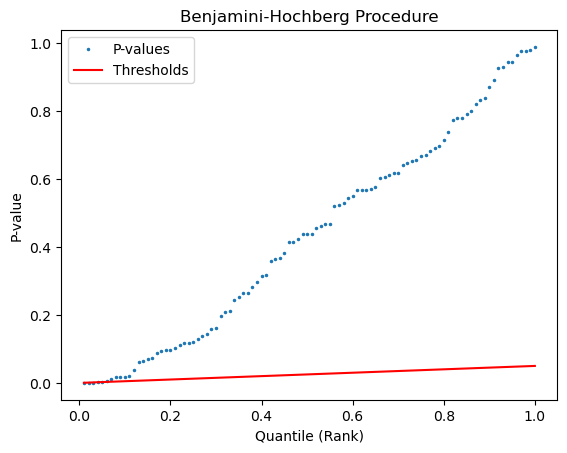

In [78]:
import matplotlib.pyplot as plt

# Perform Benjamini-Hochberg procedure
reject, sorted_p_values, sorted_thresholds = FDR(p_values, alpha=0.05)

# Create a scatter plot of the sorted p-values
qntl = np.linspace(1/100,1,100)
plt.plot(qntl, sorted(sorted_p_values),'.',markersize=3)

# Plot the thresholds
plt.plot(qntl, sorted_thresholds, color='red')

# Add labels and title
plt.xlabel('Quantile (Rank)')
plt.ylabel('P-value')
plt.title('Benjamini-Hochberg Procedure')
plt.legend(['P-values','Thresholds'])

# Show the plot
plt.show()